In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

In [16]:
df = pd.read_csv('./data/AL.csv')
df

,index,Key,Name,DateTime,Record,Status,Lat,Lon,Wind,Pressure,...,SW34,NW34,NE50,SE50,SW50,NW50,NE64,SE64,SW64,NW64
0,0,AL011851,UNNAMED,1851-06-25T00:00:00Z,NaN,HU,28.0,-94.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AL011851,UNNAMED,1851-06-25T06:00:00Z,NaN,HU,28.0,-95.4,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AL011851,UNNAMED,1851-06-25T12:00:00Z,NaN,HU,28.0,-96.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AL011851,UNNAMED,1851-06-25T18:00:00Z,NaN,HU,28.1,-96.5,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AL011851,UNNAMED,1851-06-25T21:00:00Z,L,HU,28.2,-96.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49686,49686,AL162016,OTTO,2016-11-25T12:00:00Z,NaN,TS,10.3,-87.5,55.0,995.0,...,30.0,40.0,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0
49687,49687,AL162016,OTTO,2016-11-25T18:00:00Z,NaN,TS,10.0,-88.8,50.0,997.0,...,30.0,40.0,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0
49688,49688,AL162016,OTTO,2016-11-26T00:00:00Z,NaN,TS,9.7,-90.2,45.0,1000.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49689,49689,AL162016,OTTO,2016-11-26T06:00:00Z,NaN,TS,9.4,-91.7,40.0,1003.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Plot number of cases by year
df['year'] = pd.to_datetime(df['DateTime']).dt.year
count = df.groupby('year').size().reset_index(name='count')

# Trend line
trend = np.polyfit(count['year'], count['count'], 1)

fig = px.line(count, x='year', y='count', title='Number of cases by year')
fig.add_trace(go.Scatter(x=count['year'], y=trend[0]*count['year']+trend[1], mode='lines', name='Trend of cases'))
fig.update_layout(legend=dict(x=0.45, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of cases')
fig.show()

In [30]:
# Plot the augmentation of cases since the beginning
count['cumsum'] = count['count'].cumsum()
fig = px.line(count, x='year', y='cumsum', title='Cumulative number of cases by year')
trend_cumsum = np.polyfit(count['year'], count['cumsum'], 1)
fig.add_trace(go.Scatter(x=count['year'], y=trend_cumsum[0]*count['year']+trend_cumsum[1], mode='lines', name='Trend of the cumulative sum'))
fig.update_layout(legend=dict(x=0.4, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Cumulative number of cases')
fig.show()

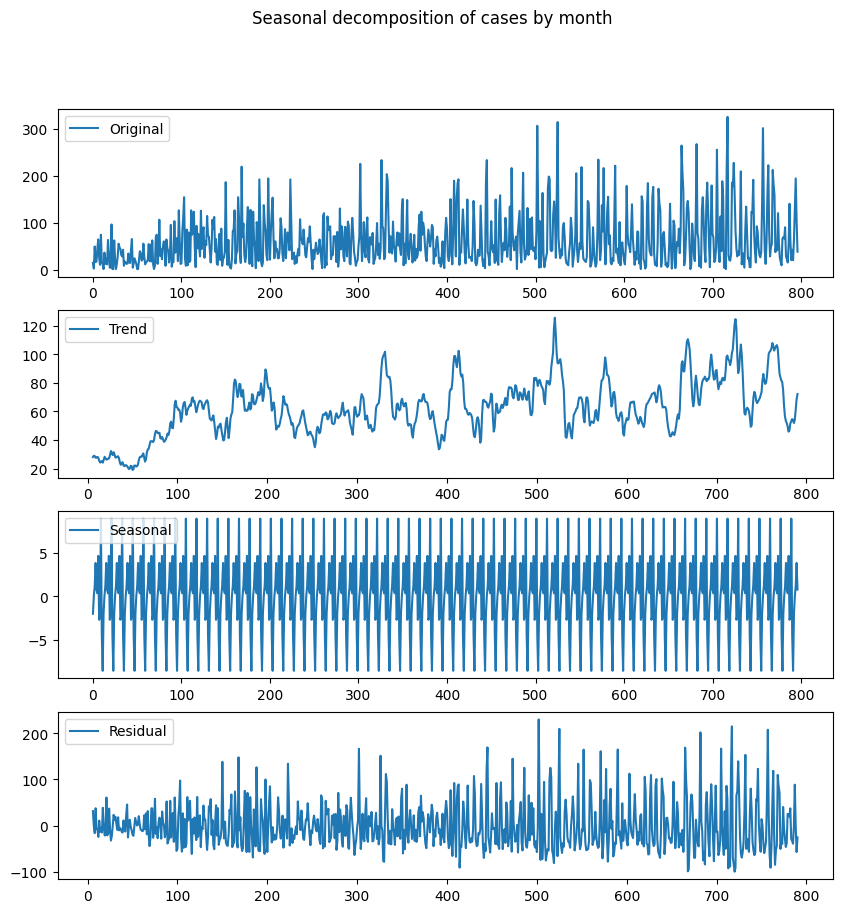

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['month'] = pd.to_datetime(df['DateTime']).dt.month
count = df.groupby(['year', 'month']).size().reset_index(name='count')


# Seasonal decomposition
decompose_result = seasonal_decompose(count['count'], model='additive', period=12)

# Subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
fig.suptitle('Seasonal decomposition of cases by month')
axs[0].plot(count['count'], label='Original')
axs[0].legend(loc='upper left')
axs[1].plot(decompose_result.trend, label='Trend')
axs[1].legend(loc='upper left')
axs[2].plot(decompose_result.seasonal, label='Seasonal')
axs[2].legend(loc='upper left')
axs[3].plot(decompose_result.resid, label='Residual')
axs[3].legend(loc='upper left')
plt.show()

In [38]:
# Plot the wind speed by year
df['Wind']

df_grouped_by_year_wind = df.groupby('year')['Wind'].median().reset_index(name='median_wind')
fig = px.line(df_grouped_by_year_wind, x='year', y='median_wind', title='Median wind speed by year')
trend_median_wind = np.polyfit(df_grouped_by_year_wind['year'], df_grouped_by_year_wind['median_wind'], 1)
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind['year'], y=trend_median_wind[0]*df_grouped_by_year_wind['year']+trend_median_wind[1], mode='lines', name='Trend of the median wind speed'))
fig.update_layout(legend=dict(x=0.4, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Median wind speed (mph)')
fig.show()